<a href="https://colab.research.google.com/github/gustavo-ifusp/alumni_usp_analytics/blob/main/alumni_evolucao_cadastros_notebook_2021_avan%C3%A7ado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

#**Alumni em nova percepção.**<br>

Responsável: Gustavo de Andrade<br>
gustavo@if.usp.br
<br>

Nova percepção, porque finalmente fui autorizado a baixar os arquivos no dashboard, posso fazer download agora misteriosamente do nada dos arquivos em csv, exportar para xls ou visualizar no google tabela os dados, muito dinâmico! e com isso não preciso mais imprimir em pdf para utilizar com o Tabula! Nova vida, novo notebook!


#**O primeiro dataframe é do "Acesso à plafatorma - Primeiro Acesso"**

In [ ]:
dados = pd.read_csv("Dashboard Alumni USP_Primeiro Acesso_Tabela dinâmica.csv")

In [ ]:
dados

,Y,M,D,login_status,genre,Record Count
0,2017,11,7,Incomplete,Female,1
1,2016,9,26,Incomplete,Female,1
2,2020,10,8,Complete,Female,28
3,2015,11,5,Incomplete,Female,229
4,2021,2,1,Incomplete,Female,50
...,...,...,...,...,...,...
6011,2021,10,5,Incomplete,Female,1
6012,2021,11,21,Incomplete,Female,1
6013,2021,10,13,Incomplete,Male,4
6014,2021,11,3,Incomplete,Male,1


In [ ]:
dados['Y']

In [ ]:
dados['data'] = date(year = dados['Y'], month = dados['M'], day = dados['D'])


TypeError: ignored

In [ ]:
n = 0
while n < len(dados):
    data = date(year = dados['Y'][n], month = dados['M'][n], day = dados['D'][n])
    dados['data'][n]= data
    n += 1

KeyError: ignored

In [ ]:
login_status_estat = dados.groupby(['login_status']).size().sort_values(ascending=False)

In [ ]:
login_status_estat

login_status
Complete      3914
Incomplete    2102
dtype: int64

(-1.1066065410570962,
 1.1119015883332808,
 -1.110593510731232,
 1.1005044528919634)

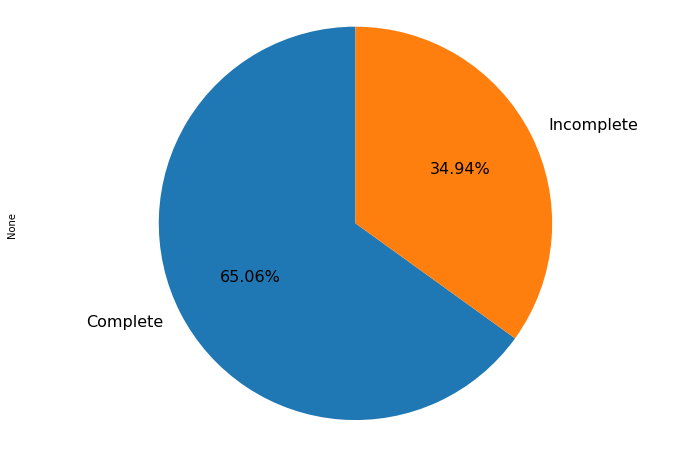

In [ ]:
fig = plt.figure(figsize=(12, 8))
login_status_estat.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [ ]:
group_record_count_y = dados.groupby(['Y'])['Record Count'].sum()

In [ ]:
group_record_count_y

Y
2015      802
2016     4322
2017    15776
2018    20047
2019    14149
2020    22362
2021    17396
Name: Record Count, dtype: int64

In [ ]:
group_record_count_y

Y
2015      802
2016     4322
2017    15776
2018    20047
2019    14149
2020    22362
2021    17396
Name: Record Count, dtype: int64

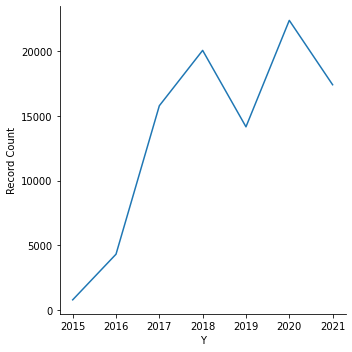

In [ ]:
sns.relplot( ci="sd", kind="line", data=group_record_count_y);

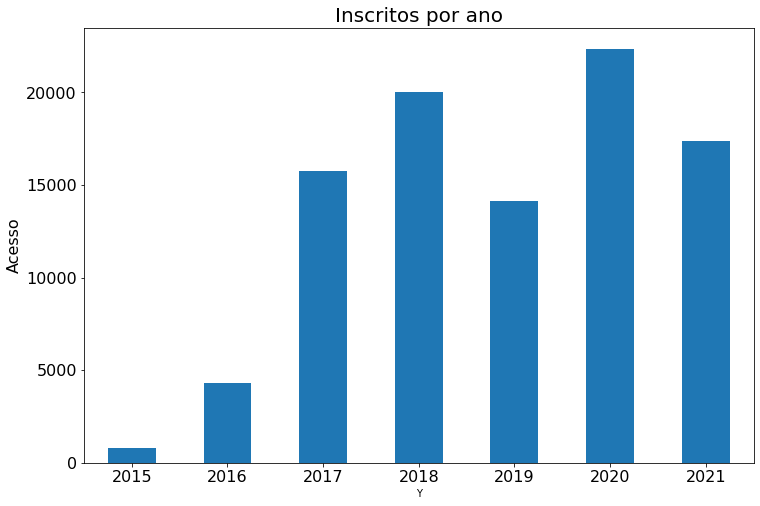

In [ ]:
plt.figure(figsize=(12, 8))
group_record_count_y.plot(kind='bar')
plt.title('Inscritos por ano', fontsize=20)
plt.ylabel('Acesso', fontsize=16)
plt.tick_params(labelsize=16)
plt.xticks(rotation=0)
plt.show()

#**O segundo dataframe é do "Acessos à plafatorma - Abrangência"**

In [ ]:
dados2 = pd.read_csv("Dashboard Alumni USP_Acesso - Abrangência_Tabela.csv")

In [ ]:
dados2

,institution,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,Faculdade de Direito de Ribeirão Preto,871,277,594,0.681975,562,0.946128
1,Instituto de Arquitetura e Urbanismo,537,211,326,0.607076,312,0.957055
2,Instituto de Estudos Brasileiros,43,17,26,0.604651,25,0.961538
3,Instituto de Medicina Tropical de São Paulo,120,53,67,0.558333,60,0.895522
4,Museu de Zoologia,70,34,36,0.514286,36,1.000000
5,Instituto de Relações Internacionais,968,477,491,0.507231,468,0.953157
6,Museu de Arqueologia e Etnologia,236,117,119,0.504237,111,0.932773
7,Museu de Arte Contemporânea,169,88,81,0.479290,76,0.938272
8,"Escola de Artes, Ciências e Humanidades",8215,4385,3830,0.466220,3609,0.942298
9,Escola de Educação Física e Esporte de Ribeirã...,431,235,196,0.454756,185,0.943878


In [ ]:
ranking_inscritos = pd.DataFrame()
ranking_inscritos['unidades'] = dados2['institution']
ranking_inscritos['total'] = dados2['is_active']
ranking_inscritos = ranking_inscritos.sort_values(['total'],ascending=False)
ranking_inscritos

,unidades,total
34,"Faculdade de Filosofia, Letras e Ciências Humanas",10950
36,Escola Politécnica,8764
20,Escola de Engenharia de São Carlos,5477
45,Faculdade de Medicina,4466
49,Faculdade de Direito,4291
47,"Escola Superior de Agricultura ""Luiz de Queiroz""",4140
8,"Escola de Artes, Ciências e Humanidades",3830
35,Escola de Comunicações e Artes,3677
28,Faculdade de Medicina de Ribeirão Preto,3579
52,"Faculdade de Economia, Administração e Contabi...",3140


In [ ]:
inscritos_alumni = ranking_inscritos['total'].sum() 
inscritos_alumni

94854

Total verificado! corresponde perfeito!

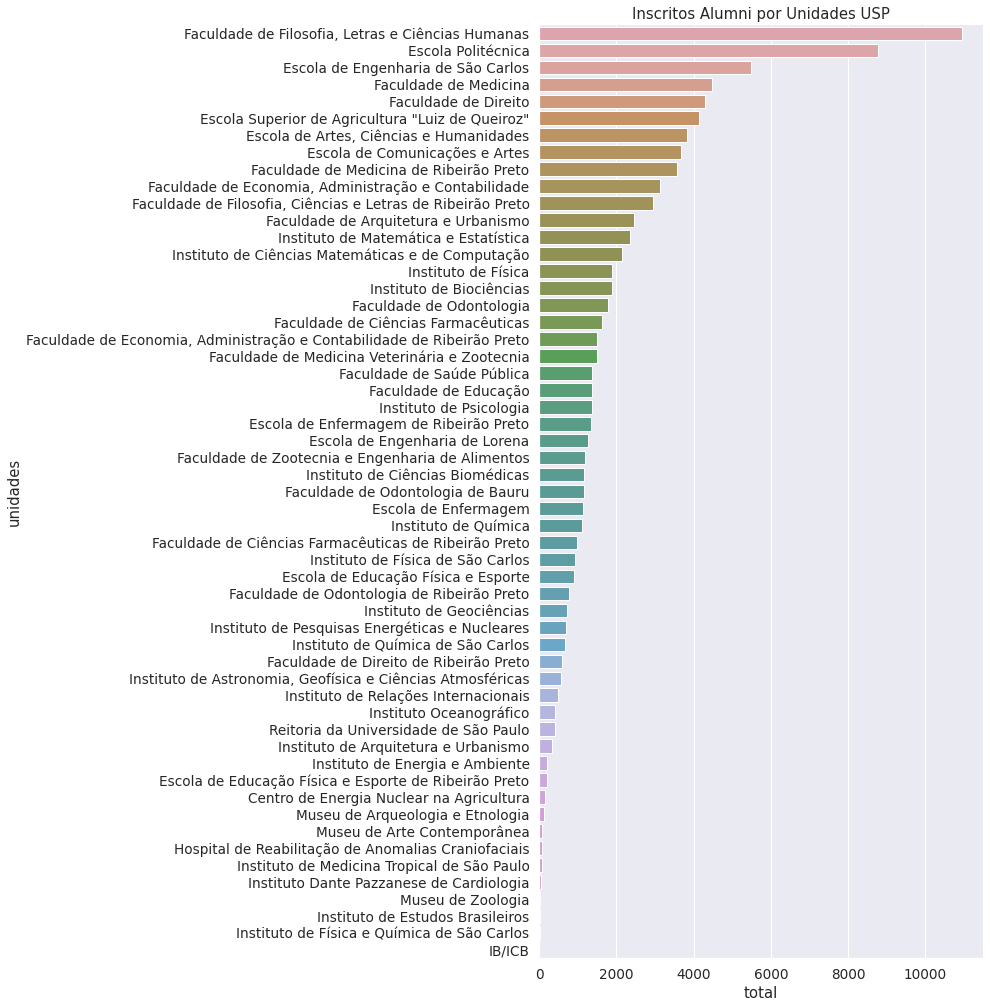

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos, x='total',y='unidades', kind="bar", height=14,saturation=.5)
g.set(title = "Inscritos Alumni por Unidades USP")

Filtrando

In [ ]:
ranking_inscritos_abs_top = ranking_inscritos[:10] 
ranking_inscritos_abs_top.to_excel('ranking_inscritos_abs_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_abs_top

,unidades,total
34,"Faculdade de Filosofia, Letras e Ciências Humanas",10950
36,Escola Politécnica,8764
20,Escola de Engenharia de São Carlos,5477
45,Faculdade de Medicina,4466
49,Faculdade de Direito,4291
47,"Escola Superior de Agricultura ""Luiz de Queiroz""",4140
8,"Escola de Artes, Ciências e Humanidades",3830
35,Escola de Comunicações e Artes,3677
28,Faculdade de Medicina de Ribeirão Preto,3579
52,"Faculdade de Economia, Administração e Contabi...",3140


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



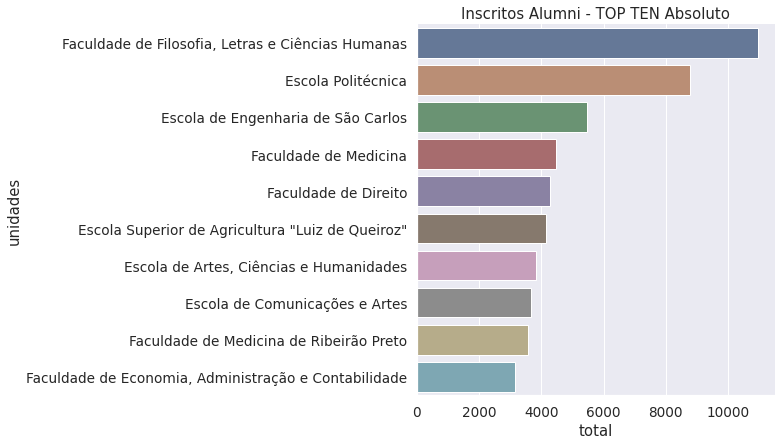

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos_abs_top, x='total',y='unidades', kind="bar", height=6,saturation=.5)
g.set(title = "Inscritos Alumni - TOP TEN Absoluto")

**Total de formados na USP**

In [ ]:
formados_total = pd.DataFrame()
formados_total['unidades'] = dados2['institution']
formados_total['total'] = dados2['total_active_inactive']
formados_total = formados_total.sort_values(['total'],ascending=False)
formados_total

,unidades,total
34,"Faculdade de Filosofia, Letras e Ciências Humanas",36738
36,Escola Politécnica,30001
49,Faculdade de Direito,18953
45,Faculdade de Medicina,17565
52,"Faculdade de Economia, Administração e Contabi...",16973
47,"Escola Superior de Agricultura ""Luiz de Queiroz""",16904
20,Escola de Engenharia de São Carlos,15056
55,NaN,13511
35,Escola de Comunicações e Artes,12484
28,Faculdade de Medicina de Ribeirão Preto,11073


In [ ]:
formados = formados_total['total'].sum() 
formados

327911

**total de inscritos Relativo**

In [ ]:
ranking_inscritos_rel = pd.DataFrame()
ranking_inscritos_rel['unidades'] = dados2['institution']
ranking_inscritos_rel['total'] = dados2['perc_active']
ranking_inscritos_rel = ranking_inscritos_rel.sort_values(['total'],ascending=False)
ranking_inscritos_rel

,unidades,total
0,Faculdade de Direito de Ribeirão Preto,0.681975
1,Instituto de Arquitetura e Urbanismo,0.607076
2,Instituto de Estudos Brasileiros,0.604651
3,Instituto de Medicina Tropical de São Paulo,0.558333
4,Museu de Zoologia,0.514286
5,Instituto de Relações Internacionais,0.507231
6,Museu de Arqueologia e Etnologia,0.504237
7,Museu de Arte Contemporânea,0.479290
8,"Escola de Artes, Ciências e Humanidades",0.466220
9,Escola de Educação Física e Esporte de Ribeirã...,0.454756


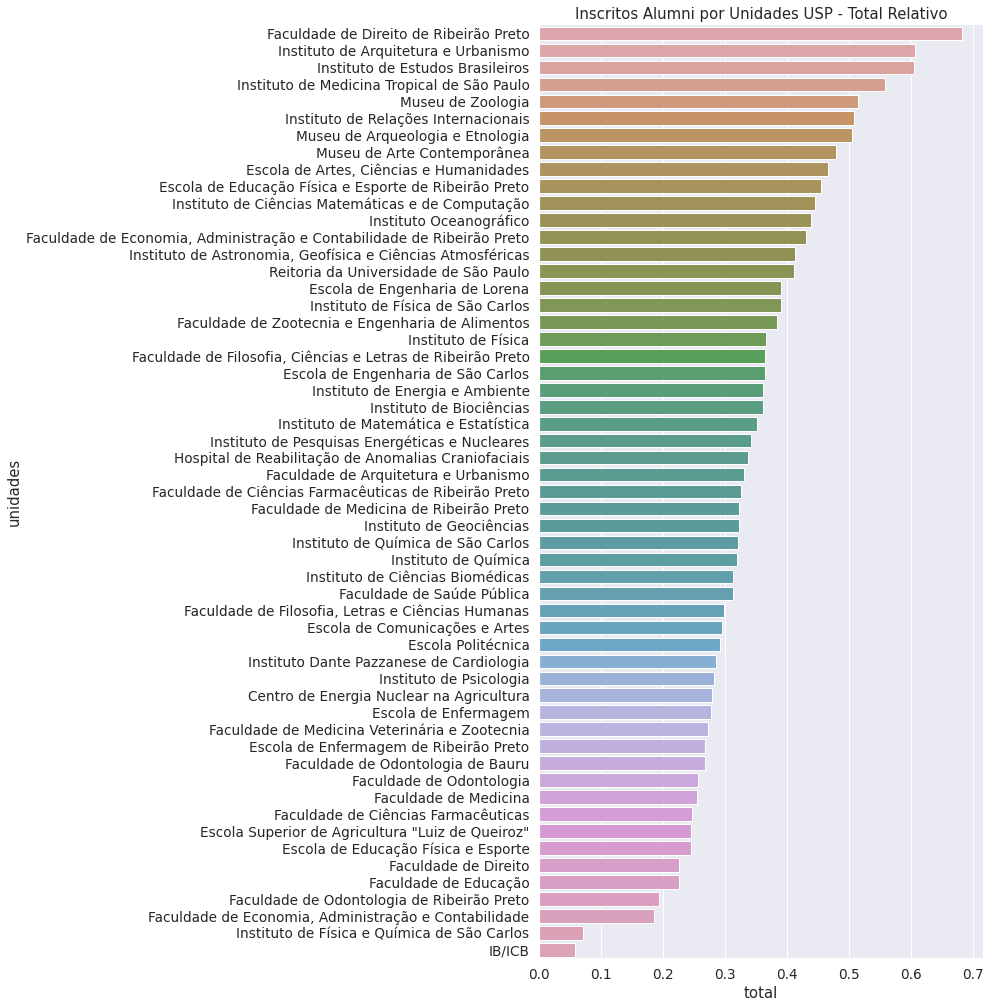

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos_rel, x='total',y='unidades', kind="bar", height=14,saturation=.5)
g.set(title = "Inscritos Alumni por Unidades USP - Total Relativo")

filtrando

In [ ]:
ranking_inscritos_rel_top = ranking_inscritos_rel[:10] 
ranking_inscritos_rel_top['total'] = ranking_inscritos_rel_top['total']*100
ranking_inscritos_rel_top.to_excel('ranking_inscritos_rel_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_rel_top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,unidades,total
0,Faculdade de Direito de Ribeirão Preto,68.197474
1,Instituto de Arquitetura e Urbanismo,60.707635
2,Instituto de Estudos Brasileiros,60.465116
3,Instituto de Medicina Tropical de São Paulo,55.833333
4,Museu de Zoologia,51.428571
5,Instituto de Relações Internacionais,50.723140
6,Museu de Arqueologia e Etnologia,50.423729
7,Museu de Arte Contemporânea,47.928994
8,"Escola de Artes, Ciências e Humanidades",46.622033
9,Escola de Educação Física e Esporte de Ribeirã...,45.475638


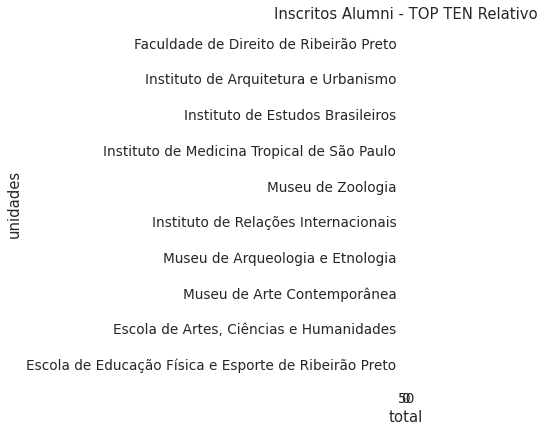

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_inscritos_rel_top, x='total',y='unidades', kind="bar", height=6,saturation=.5)
g.set(title = "Inscritos Alumni - TOP TEN Relativo")

**Perfil completo ou incompleto - Total**

In [ ]:
ranking_perfil_completo = pd.DataFrame()
ranking_perfil_completo['unidades'] = dados2['institution']
ranking_perfil_completo['total'] = dados2['is_complete']
ranking_perfil_completo = ranking_perfil_completo.sort_values(['total'],ascending=False)
ranking_perfil_completo

,unidades,total
34,"Faculdade de Filosofia, Letras e Ciências Humanas",10106
36,Escola Politécnica,7952
20,Escola de Engenharia de São Carlos,5149
45,Faculdade de Medicina,4185
49,Faculdade de Direito,3948
47,"Escola Superior de Agricultura ""Luiz de Queiroz""",3838
8,"Escola de Artes, Ciências e Humanidades",3609
35,Escola de Comunicações e Artes,3409
28,Faculdade de Medicina de Ribeirão Preto,3347
52,"Faculdade de Economia, Administração e Contabi...",2928


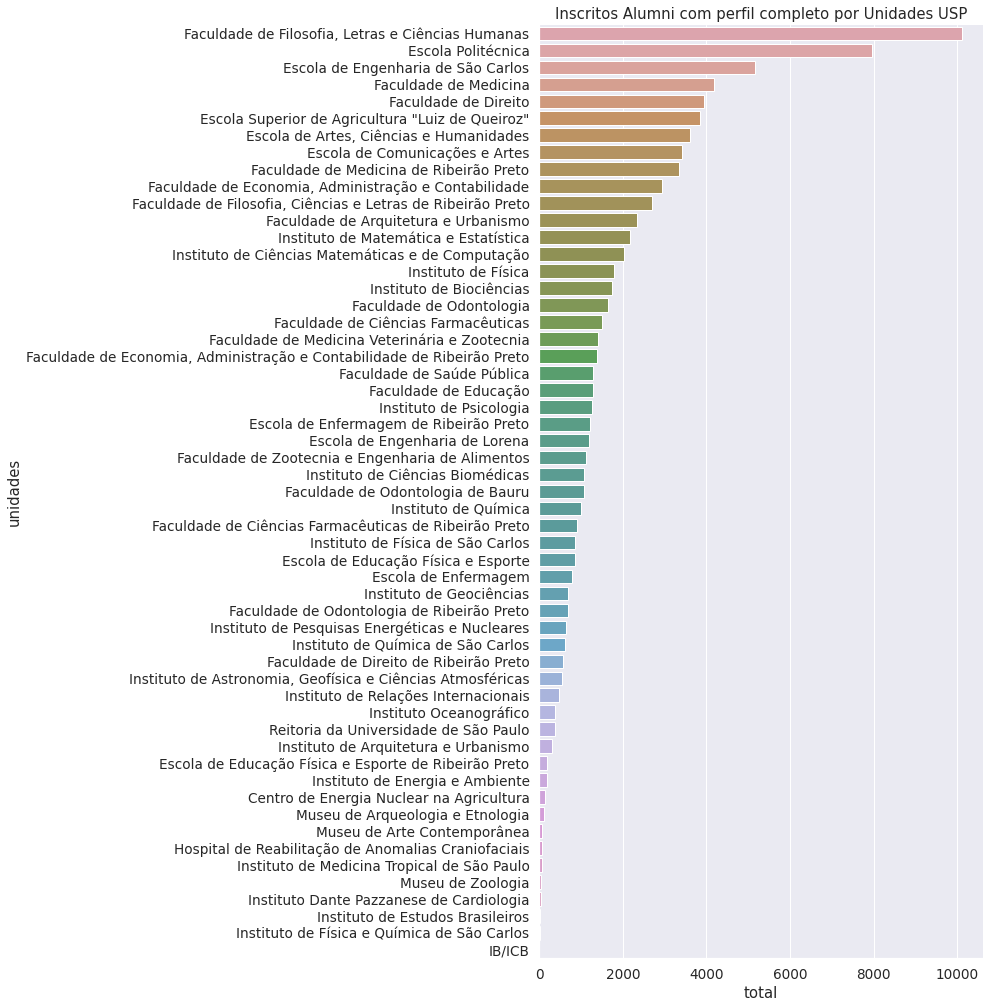

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo, x='total',y='unidades', kind="bar", height=14,saturation=.5)
g.set(title = "Inscritos Alumni com perfil completo por Unidades USP")

filtrando

In [ ]:
ranking_perfil_completo = ranking_perfil_completo[:10] 
ranking_perfil_completo.to_excel('ranking_perfil_completo.xlsx', sheet_name='Sheet1')
ranking_perfil_completo

,unidades,total
34,"Faculdade de Filosofia, Letras e Ciências Humanas",10106
36,Escola Politécnica,7952
20,Escola de Engenharia de São Carlos,5149
45,Faculdade de Medicina,4185
49,Faculdade de Direito,3948
47,"Escola Superior de Agricultura ""Luiz de Queiroz""",3838
8,"Escola de Artes, Ciências e Humanidades",3609
35,Escola de Comunicações e Artes,3409
28,Faculdade de Medicina de Ribeirão Preto,3347
52,"Faculdade de Economia, Administração e Contabi...",2928


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



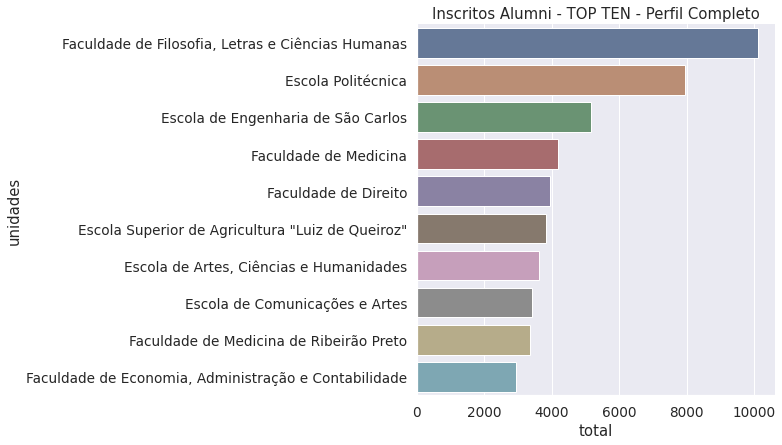

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo, x='total',y='unidades', kind="bar", height=6,saturation=.5)
g.set(title = "Inscritos Alumni - TOP TEN - Perfil Completo")

**Perfil completo ou incompleto - Relativo**

In [ ]:
ranking_perfil_completo_rel = pd.DataFrame()
ranking_perfil_completo_rel['unidades'] = dados2['institution']
ranking_perfil_completo_rel['total'] = dados2['perc_complete']
ranking_perfil_completo_rel = ranking_perfil_completo_rel.sort_values(['total'],ascending=False)
ranking_perfil_completo_rel

,unidades,total
4,Museu de Zoologia,1.000000
48,Escola de Educação Física e Esporte,0.961883
2,Instituto de Estudos Brasileiros,0.961538
1,Instituto de Arquitetura e Urbanismo,0.957055
5,Instituto de Relações Internacionais,0.953157
26,Faculdade de Arquitetura e Urbanismo,0.951744
18,Instituto de Física,0.947922
0,Faculdade de Direito de Ribeirão Preto,0.946128
15,Escola de Engenharia de Lorena,0.944532
10,Instituto de Ciências Matemáticas e de Computação,0.943904


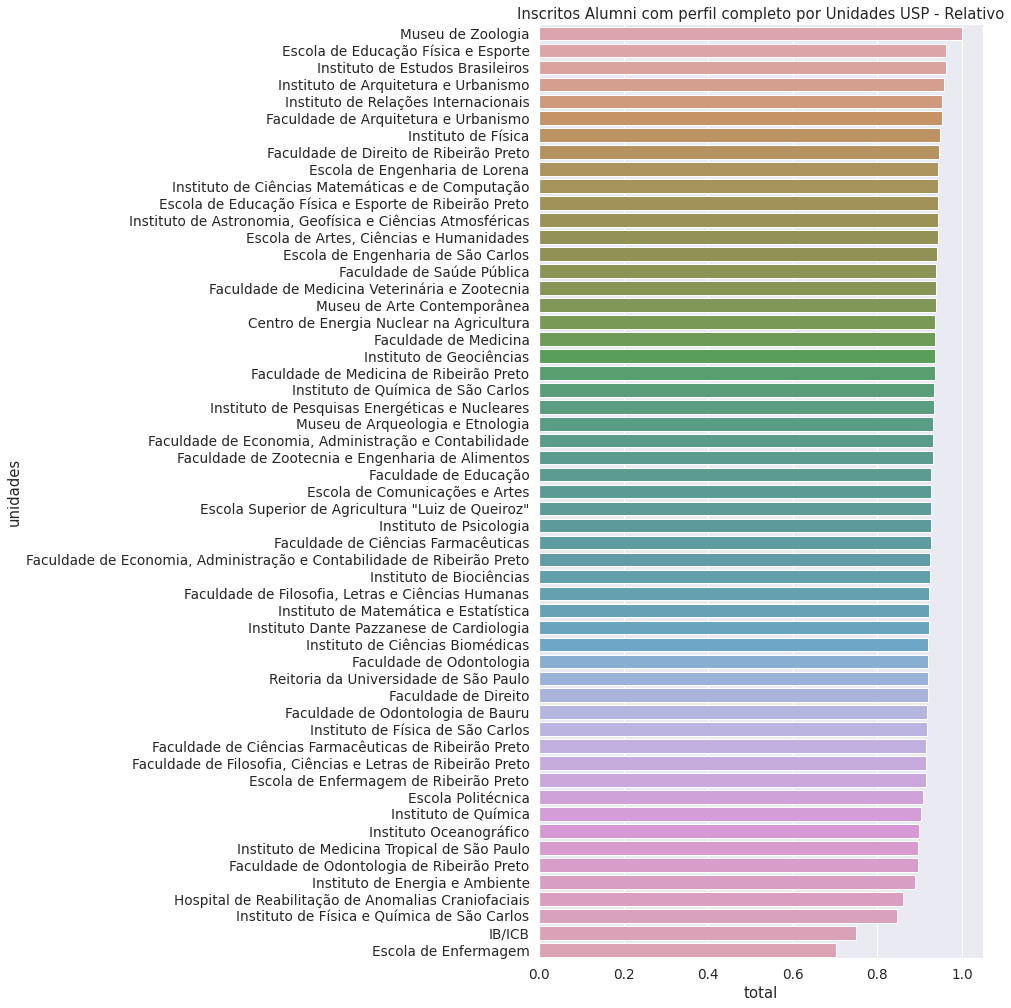

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= ranking_perfil_completo_rel, x='total',y='unidades', kind="bar", height=14,saturation=.5)
g.set(title = "Inscritos Alumni com perfil completo por Unidades USP - Relativo")

#**O Terceiro DataFrame é:"Acessos à plafatorma - Demográfico"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [ ]:
dados3_1 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela.csv")
dados3_2 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela dinâmica.csv")

In [ ]:
dados3_1

,periodstartyear,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,2021.0,1,0,1,1.000000,0,0.000000
1,2020.0,32,12,20,0.625000,20,1.000000
2,2019.0,671,319,352,0.524590,333,0.946023
3,2018.0,2083,679,1404,0.674028,1346,0.958689
4,2017.0,4265,1495,2770,0.649472,2675,0.965704
...,...,...,...,...,...,...,...
62,1957.0,1,0,1,1.000000,1,1.000000
63,1956.0,1,1,0,0.000000,0,NaN
64,1952.0,1,1,0,0.000000,0,NaN
65,1951.0,1,1,0,0.000000,0,NaN


In [ ]:
dados3_2

,age,Record Count,Record Count.1
0,Entre 41 e 50,17567,0.185200
1,Entre 31 e 40,37197,0.392150
2,Entre 61 e 70,4058,0.042782
3,Entre 51 e 60,9138,0.096338
4,Entre 26 e 30,19147,0.201858
5,Entre 71 e 80,656,0.006916
6,Entre 81 e 90,24,0.000253
7,Entre 91 ou mais,19,0.000200
8,Entre 21 e 25,7046,0.074283
9,Entre 0 e 20,2,0.000021


Sinceramente não sei o que fazer aqui agora, depois volto para pensar mais!

#**O quarto DataFrame é: "Análise dos que não completaram o fluxo"**<br>


In [ ]:
dados4 = pd.read_csv("Dashboard Alumni USP_Fluxo Incompleto_Tabela dinâmica.csv")

In [ ]:
dados4 

,years_lastlogin,incomplete_status,Record Count
0,4,1_Term,518
1,5,1_Term,1316
2,6,1_Term,368
3,0,2_Personal Data,1028
4,3,2_Personal Data,775
5,0,1_Term,138
6,0,3_Privacy,284
7,1,2_Personal Data,690
8,3,1_Term,175
9,2,2_Personal Data,564


In [ ]:
fluxo_incompl_ano = pd.DataFrame()
fluxo_incompl_ano['anos'] = dados4['years_lastlogin']
fluxo_incompl_ano['total'] = dados4['Record Count']
fluxo_incompl_ano = fluxo_incompl_ano.sort_values(['total'],ascending=False)
fluxo_incompl_ano

,anos,total
1,5,1316
3,0,1028
4,3,775
7,1,690
9,2,564
0,4,518
2,6,368
6,0,284
11,4,262
16,1,213


In [ ]:
fluxo_incompl_ano = fluxo_incompl_ano.groupby(['anos'])['total'].sum()
fluxo_incompl_ano

anos
0    1450
1    1071
2     895
3    1081
4     954
5    1316
6     368
Name: total, dtype: int64

(-1.1131995721068322,
 1.1095049591101915,
 -1.112932856433908,
 1.1006158503063765)

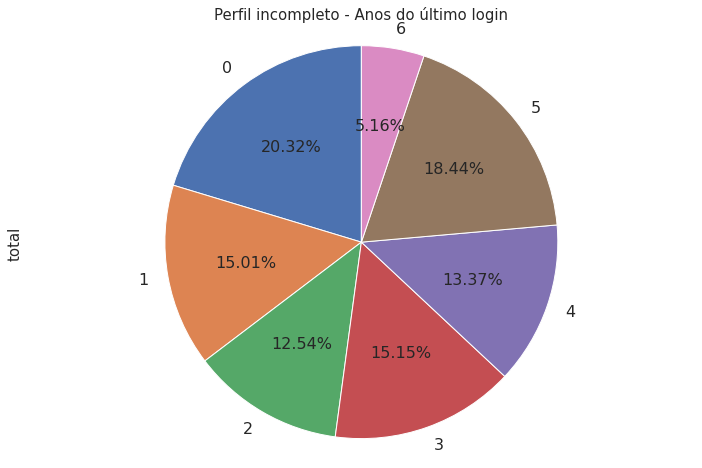

In [ ]:
fig = plt.figure(figsize=(12, 8))
fluxo_incompl_ano.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16}).set_title("Perfil incompleto - Anos do último login")
plt.axis('equal') 

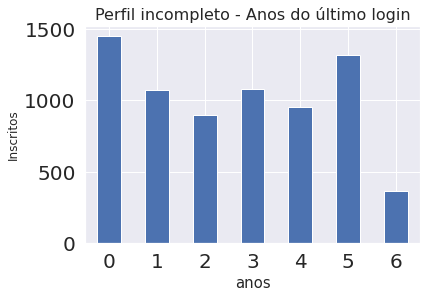

In [ ]:
fluxo_incompl_ano.plot(kind='bar')
plt.title('Perfil incompleto - Anos do último login', fontsize=16)
plt.ylabel('Inscritos', fontsize=12)
plt.tick_params(labelsize=20)
plt.xticks(rotation=0)
plt.show()

por motivo

In [ ]:
fluxo_incompl_mot = pd.DataFrame()
fluxo_incompl_mot['status'] = dados4['incomplete_status']
fluxo_incompl_mot['total'] = dados4['Record Count']
fluxo_incompl_mot = fluxo_incompl_mot.sort_values(['total'],ascending=False)
fluxo_incompl_mot = fluxo_incompl_mot.groupby(['status'])['total'].sum()
fluxo_incompl_mot

status
1_Term             2861
2_Personal Data    3319
3_Privacy           955
Name: total, dtype: int64

(-1.1176446180877007,
 1.1010669907797253,
 -1.1218284790880955,
 1.1010394513851474)

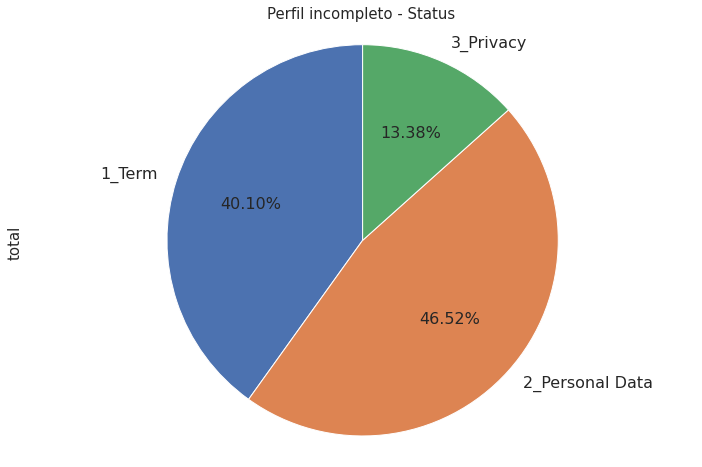

In [ ]:
fig = plt.figure(figsize=(12, 8))
fluxo_incompl_mot.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16}).set_title("Perfil incompleto - Status")
plt.axis('equal') 

#**O quinto DataFrame é: "Status Profissional"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [ ]:
dados5 = pd.read_csv("Dashboard Alumni USP_Status Profissional_Tabela dinâmica.csv")

In [ ]:
dados5

,prof_status,Y,Record Count
0,Sou Pós-doutorando,2020,467
1,Sou Servidor Público Estadual,2020,1046
2,-,2020,336
3,Estou Procurando Emprego,2015,8
4,Sou Empregado ou Servidor Público,2020,5605
...,...,...,...
97,Procuro meu Primeiro Emprego,2016,9
98,Procuro meu Primeiro Emprego,2017,83
99,Nenhuma das anteriores,2015,1
100,Procuro meu Primeiro Emprego,2021,621


In [ ]:
prof_status_total = dados5.groupby(by="prof_status")['Record Count'].sum().sort_values(ascending=False)
prof_status_total

prof_status
Sou Empregado ou Servidor Público    32425
Sou Empregado                        12454
-                                    11592
Sou Profissional Liberal              5383
Estou Procurando Emprego              4400
Sou Empreendedor                      3923
Sou Estudante                         3021
Sou Estudante com Bolsa               2880
Sou Servidor Público Federal          2631
Sou Servidor Público Estadual         2533
Procuro meu Primeiro Emprego          2329
Sou Servidor Público Municipal        1250
Nenhuma das anteriores                1119
Sou Pós-doutorando                    1060
Estou Aposentado                       719
Name: Record Count, dtype: int64

In [ ]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prof_status   102 non-null    object
 1   Y             102 non-null    int64 
 2   Record Count  102 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


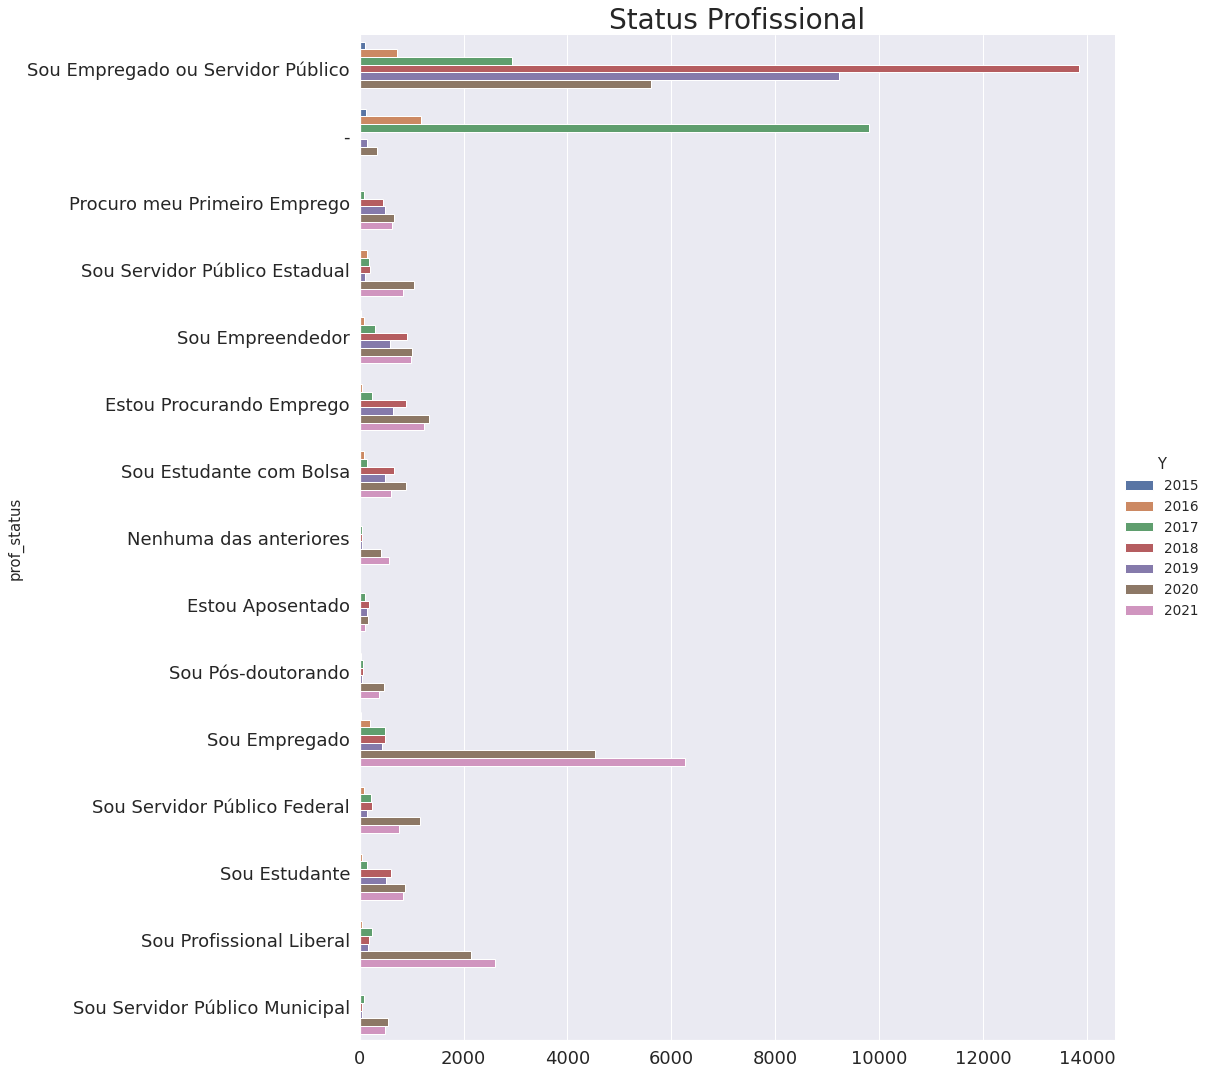

In [ ]:
sns.catplot( y="prof_status", x="Record Count", hue="Y", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

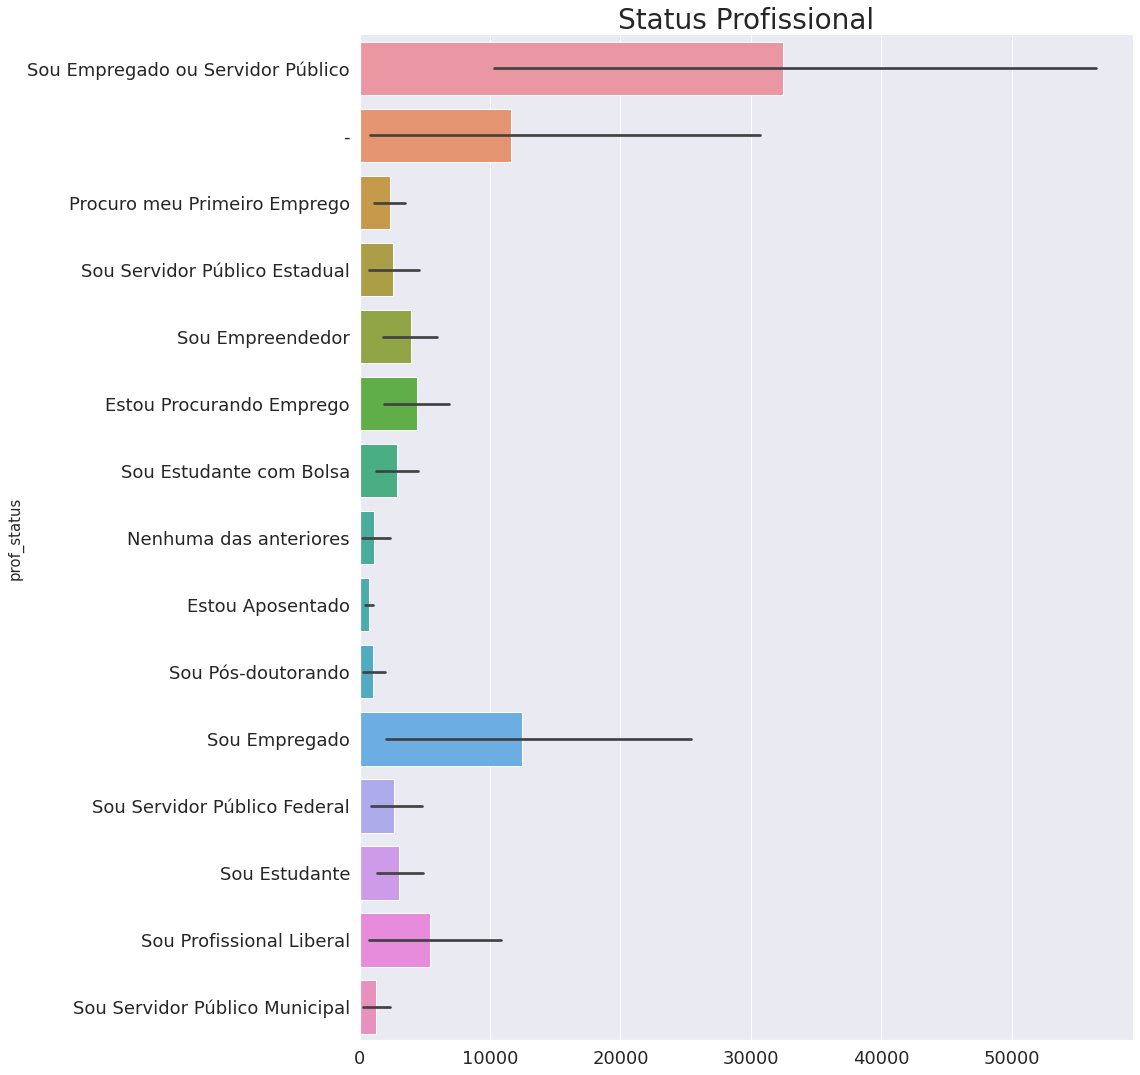

In [ ]:
sns.catplot( y="prof_status", x="Record Count", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

#**O sexto DataFrame é: "Área de Atuação"**


In [ ]:
dados6 = pd.read_csv("Dashboard Alumni USP_Área de Atuação_Tabela dinâmica.csv")

In [ ]:
dados6

,prof_field,Y,Record Count
0,na mesma área da minha Pós-Graduação na USP,2020,3991
1,-,2020,337
2,na mesma área de todas minhas formações na USP,2015,138
3,na mesma área de todas minhas formações na USP,2020,7126
4,na mesma área de todas minhas formações na USP,2018,13112
5,-,2016,1181
6,-,2017,9799
7,na mesma área da minha Graduação na USP,2021,7433
8,na mesma área de todas minhas formações na USP,2019,8726
9,na mesma área de todas minhas formações na USP,2016,944


Total de respostas:

In [ ]:
dados6['Record Count'].sum()


87719

In [ ]:
area_atuacao = pd.DataFrame()
area_atuacao['unidades'] = dados6['prof_field']
area_atuacao['total'] = dados6['Record Count']
area_atuacao = area_atuacao.sort_values(['total'],ascending=False)
area_atuacao

,unidades,total
4,na mesma área de todas minhas formações na USP,13112
6,-,9799
8,na mesma área de todas minhas formações na USP,8726
7,na mesma área da minha Graduação na USP,7433
3,na mesma área de todas minhas formações na USP,7126
19,na mesma área da minha Graduação na USP,4429
0,na mesma área da minha Pós-Graduação na USP,3991
27,em outra área,3282
31,em outra área,3217
11,na mesma área de todas minhas formações na USP,3192


In [ ]:
area_atuacao = area_atuacao.groupby(['unidades'])['total'].sum().sort_values(ascending=False)
area_atuacao 

unidades
na mesma área de todas minhas formações na USP    34646
na mesma área da minha Graduação na USP           12886
em outra área                                     11698
-                                                 11600
não atuo profissionalmente                         8531
na mesma área da minha Pós-Graduação na USP        8358
Name: total, dtype: int64

In [ ]:
area_atuacao = pd.DataFrame(area_atuacao)

In [ ]:
area_atuacao

,total
unidades,
na mesma área de todas minhas formações na USP,34646
na mesma área da minha Graduação na USP,12886
em outra área,11698
-,11600
não atuo profissionalmente,8531
na mesma área da minha Pós-Graduação na USP,8358


In [ ]:
area_atu = pd.DataFrame() 
area_atu = area_atu.append(area_atuacao.loc[:])

In [ ]:
area_atu.to_excel('area_atuacao.xlsx', sheet_name='Sheet1')

In [ ]:
area_atu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, na mesma área de todas minhas formações na USP to na mesma área da minha Pós-Graduação na USP
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes


In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= area_atu, y='unidades',x='total', kind="bar")
g.set(title = "Área de Atuação - Inscritos Alumni")

ValueError: ignored

In [ ]:
fig = plt.figure(figsize=(12, 8))
area_atuacao.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

ValueError: ignored

<Figure size 864x576 with 0 Axes>

#**O sétimo DataFrame é: " Área de Atuação - por Instituição"**

Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica

In [ ]:
dados7 = pd.read_csv("Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica.csv")

In [ ]:
dados7

,institution,prof_field,Record Count
0,Escola de Enfermagem,na mesma área da minha Pós-Graduação na USP,92
1,Escola de Enfermagem,-,113
2,Escola de Enfermagem,na mesma área de todas minhas formações na USP,358
3,Escola de Enfermagem,na mesma área da minha Graduação na USP,112
4,Escola de Enfermagem,não atuo profissionalmente,88
...,...,...,...
323,Instituto de Estudos Brasileiros,na mesma área da minha Graduação na USP,2
324,Instituto de Energia e Ambiente,na mesma área da minha Graduação na USP,6
325,Instituto Dante Pazzanese de Cardiologia,na mesma área da minha Graduação na USP,1
326,Instituto de Estudos Brasileiros,em outra área,5


In [ ]:
dados7['prof_field'].unique()

array(['na mesma área da minha Pós-Graduação na USP', '-',
       'na mesma área de todas minhas formações na USP',
       'na mesma área da minha Graduação na USP',
       'não atuo profissionalmente', 'em outra área'], dtype=object)

In [ ]:
mesma_area_pos_gr = dados7.loc['prof_field' : 'na mesma área da minha Pós-Graduação na USP']
mesma_area_pos_gr

,institution,prof_field,Record Count


In [ ]:
mesma_area_pos_gr = pd.DataFrame()
mesma_area_pos_gr = dados7.loc['prof_field' : 'na mesma área da minha Pós-Graduação na USP']
mesma_area_pos_gr['unidades'] = dados2['institution']
mesma_area_pos_gr['total'] = dados2['is_active']
mesma_area_pos_gr = mesma_area_pos_gr.sort_values(['total'],ascending=False)
mesma_area_pos_gr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,institution,prof_field,Record Count,unidades,total
34,NaN,NaN,NaN,"Faculdade de Filosofia, Letras e Ciências Humanas",10950
36,NaN,NaN,NaN,Escola Politécnica,8764
20,NaN,NaN,NaN,Escola de Engenharia de São Carlos,5477
45,NaN,NaN,NaN,Faculdade de Medicina,4466
49,NaN,NaN,NaN,Faculdade de Direito,4291
47,NaN,NaN,NaN,"Escola Superior de Agricultura ""Luiz de Queiroz""",4140
8,NaN,NaN,NaN,"Escola de Artes, Ciências e Humanidades",3830
35,NaN,NaN,NaN,Escola de Comunicações e Artes,3677
28,NaN,NaN,NaN,Faculdade de Medicina de Ribeirão Preto,3579
52,NaN,NaN,NaN,"Faculdade de Economia, Administração e Contabi...",3140


In [ ]:
teste = dados7.groupby(by=['institution','prof_field'=="na mesma área da minha Pós-Graduação na USP"])['Record Count'].sum()
teste 

KeyError: ignored

In [ ]:
dados7['prof_field'] = 'na mesma área da minha Pós-Graduação na USP'

#**O oitavo DataFrame é: " Área de Atuação - Empreendedores"**